# Web Scrapping and Data Cleaning

In [79]:
from google.colab import drive
drive.mount('/content/drive')
import os
path = '/content/drive/My Drive/End-to-End Data Science'
os.chdir('/content/drive/My Drive/End-to-End Data Science')
folder = os.path.join('/content/drive/My Drive/End-to-End Data Science')
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'1 - Project Planning:.gdoc'   code.ipynb   dataset.csv   FlaskAPI


In [2]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

Standard stats for players in the Top 5 Leagues in Europe

In [3]:
url = 'https://fbref.com/en/comps/Big5/2021-2022/stats/players/2021-2022-Big-5-European-Leagues-Stats'
r = requests.get(url) #The get() method sends a GET request to the specified url.

In [4]:
df = pd.read_html(r.text, header = None)
df_goal_shot = df[0]

Renaming column for a more concise presentation

In [5]:
new_col = []
for i in range(df_goal_shot.shape[1]):
  #print(df_goal_shot.columns[i][1])
  new_col.append(df_goal_shot.columns[i][1])

df_goal_shot.columns = new_col
columns_shot = df_goal_shot.columns

Removing Duplicates

In [6]:
df1 = df_goal_shot.loc[:,~df_goal_shot.columns.duplicated()].copy()

In [7]:
df1.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,CrdY,CrdR,G+A,G+A-PK,xG,npxG,xAG,npxG+xAG,xG+xAG,Matches
0,1,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,21,2000,34,32,...,8,0,0.06,0.06,0.9,0.9,1.6,2.5,0.08,Matches
1,2,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,33,1987,34,34,...,5,1,0.06,0.06,1.5,1.5,0.9,2.4,0.07,Matches
2,3,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21,2000,31,29,...,12,3,0.04,0.04,1.1,1.1,1.0,2.0,0.07,Matches
3,4,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,28,1993,34,34,...,9,0,0.06,0.06,2.1,2.1,4.4,6.4,0.20,Matches
4,5,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21,2000,1,1,...,0,0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,Matches


Shots and Goal Creation stats for players in the Top 5 Leagues in Europe

In [8]:
url = 'https://fbref.com/en/comps/Big5/2021-2022/gca/players/2021-2022-Big-5-European-Leagues-Stats'
r = requests.get(url) #The get() method sends a GET request to the specified url.

In [9]:
df = pd.read_html(r.text, header = None)
df_general = df[0]

In [10]:
new_col = []
for i in range(df_general.shape[1]):
  #print(df_general.columns[i][1])
  new_col.append(df_general.columns[i][1])
  

In [11]:
new_col[14] = 'shots_lead_shots'
new_col[22] = 'shots_lead_goals'
new_col[11] = 'PassLive_shots'
new_col[19] = 'PassLive_goals'
new_col[15] = 'PassLive_shots'
new_col[23] = 'PassLive_goals'
new_col[16] = 'Def_shots'
new_col[24] = 'Def_goals'
new_col[13] = 'Drib_shots'
new_col[21] = 'Drib_goals'

In [12]:
df_general.columns = new_col
columns_general = df_general.columns
df_general.shape

(3037, 26)

Removing Duplicates

In [13]:
df2 = df_general.loc[:,~df_general.columns.duplicated()].copy()

In [14]:
df2.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,90s,SCA,...,Drib_shots,shots_lead_shots,Def_shots,GCA,GCA90,PassLive_goals,Drib_goals,shots_lead_goals,Def_goals,Matches
0,1,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,21,2000,32.0,46,...,2,3,1,3,0.09,3,0,0,0,Matches
1,2,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,33,1987,33.1,22,...,2,1,2,1,0.03,1,0,0,0,Matches
2,3,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21,2000,27.4,50,...,0,4,1,3,0.11,3,0,0,0,Matches
3,4,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,28,1993,32.8,83,...,3,1,3,9,0.27,8,0,0,0,Matches
4,5,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21,2000,0.5,1,...,0,0,0,0,0.00,0,0,0,0,Matches


In [15]:
matched_features = set(df1.columns).intersection(df2.columns)
matched_features

{'90s',
 'Age',
 'Born',
 'Comp',
 'Matches',
 'Nation',
 'Player',
 'Pos',
 'Rk',
 'Squad'}

Combining Data Frames

In [16]:
df3 = pd.concat([df2,df1], axis = 1)
df3.shape

(3037, 50)

Removing Duplicates

In [17]:
df_fin = df3.loc[:,~df3.columns.duplicated()].copy()

In [18]:
df_fin.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,90s,SCA,...,PKatt,CrdY,CrdR,G+A,G+A-PK,xG,npxG,xAG,npxG+xAG,xG+xAG
0,1,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,21,2000,32.0,46,...,0,8,0,0.06,0.06,0.9,0.9,1.6,2.5,0.08
1,2,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,33,1987,33.1,22,...,0,5,1,0.06,0.06,1.5,1.5,0.9,2.4,0.07
2,3,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21,2000,27.4,50,...,0,12,3,0.04,0.04,1.1,1.1,1.0,2.0,0.07
3,4,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,28,1993,32.8,83,...,0,9,0,0.06,0.06,2.1,2.1,4.4,6.4,0.20
4,5,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21,2000,0.5,1,...,0,0,0,0.00,0.00,0.0,0.0,0.0,0.0,0.00


Saving Data Frame into a CSV file

In [19]:
#df_fin.to_csv('dataset.csv')

Mapping to identify Acronyms

In [20]:
A2F= {'Rk':'Rank', 'Player':'Player', 'Nation':'Nation', 'Pos': 'Position', 'Squad':'Squad', 'Comp':'Competition', 'Age':'Age', 'Born':'Born', '90s':'Full matches played in the entire season',
       'SCA':'Shot-Creating Actions', 'SCA90':'Shot-Creating Actions per 90', 'PassLive':'Completed live-ball passes that lead to a shot attempt', 'PassDead':'Completed dead-ball passes that lead to a shot attempt Includes free kicks, corner kicks, kick offs, throw-ins and goal kicks', 
       'GCA':' Goal-Creating Actions', 'GCA90':' Goal-Creating Actions per 90', 'PassLive':' Completed live-ball passes that lead to a goal', 'PassDead':'Completed dead-ball passes that lead to a goal', 'Drib':'Successful dribbles that lead to a goal', 'Sh':' Shots that lead to another goal-scoring shot', 'Fld':' Fouls drawn that lead to a goal', 'Def':'Defensive actions that lead to a goal',
       'Matches':'Matches', 'MP':'Matches played', 'Starts':'games Started by the player', 'Min':'Minutes Played', 'Gls':'Goals Scored', 'Ast':'Assists', 'G-PK':'Non-Penalty Goals', 'PK':'Penalty Kicks Made', 'PKatt':'Penalty Kicks Made',
       'CrdY':'Yellow Cards', 'CrdR':'Red Cards', 'xG':'Expected Goals', 'npxG': 'non penalty expected goals',
       'xAG':'Expected Assisted Goals'}

Remove Redundant features

In [21]:
df_fin.drop(['Rk','npxG+xAG', 'xG+xAG','Born','Matches','G+A', 'G+A-PK', 'xG', 'npxG', 'xAG', 'G+A-PK'], axis=1, inplace= True)

Creating Top Team Feature

In [22]:
Top_teams = ['Arsenal','Tottenham','Chelsea','Liverpool','Manchester City','Manchester Utd', 'Real Madrid','Barcelona', 'Atlético Madrid', 'Marseille', 'Paris S-G', 'Bayern Munich', 'Dortmund', 'Milan', 'Inter', 'Roma', 'Juventus', 'Napoli' ]
df_fin['Top_Team'] = df_fin['Squad'].apply(lambda x: 1 if x in Top_teams else 0)
df_fin.head()

,Player,Nation,Pos,Squad,Comp,Age,90s,SCA,SCA90,PassLive_shots,...,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Top_Team
0,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,21,32.0,46,1.44,34,...,32,2881,0,2,0,0,0,8,0,0
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,33,33.1,22,0.66,17,...,34,2983,2,0,2,0,0,5,1,0
2,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21,27.4,50,1.83,41,...,29,2462,1,0,1,0,0,12,3,0
3,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,28,32.8,83,2.53,67,...,34,2956,0,2,0,0,0,9,0,0
4,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21,0.5,1,2.00,1,...,1,45,0,0,0,0,0,0,0,0


In [23]:
df_fin['Top_Team'].value_counts()

0    2513
1     524
Name: Top_Team, dtype: int64

Removing empty Rows

In [24]:
df_fin_filtered = df_fin[df_fin['Squad'] != 'Squad']

In [25]:
df_fin_filtered.Squad.value_counts()

Salernitana       42
Genoa             40
Saint-Étienne     39
Bordeaux          39
Venezia           39
                  ..
West Ham          25
Celta Vigo        25
Tottenham         25
Crystal Palace    24
Burnley           23
Name: Squad, Length: 98, dtype: int64

Adding the Strikers Features

In [26]:
positions = ['FW','AM','LW','RW']
df_fin_filtered['Strikers'] = df_fin_filtered.Pos.apply(lambda x: 1 if x in positions else 0)

<ipython-input-26-b1122bbbacd0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fin_filtered['Strikers'] = df_fin_filtered.Pos.apply(lambda x: 1 if x in positions else 0)


In [27]:
df_fin_filtered['Strikers'].value_counts()

0    2522
1     399
Name: Strikers, dtype: int64

# Exploratory Data Analysis

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [29]:
df_fin_filtered.head()

,Player,Nation,Pos,Squad,Comp,Age,90s,SCA,SCA90,PassLive_shots,...,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Top_Team,Strikers
0,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,21,32.0,46,1.44,34,...,2881,0,2,0,0,0,8,0,0,0
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,33,33.1,22,0.66,17,...,2983,2,0,2,0,0,5,1,0,0
2,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21,27.4,50,1.83,41,...,2462,1,0,1,0,0,12,3,0,0
3,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,28,32.8,83,2.53,67,...,2956,0,2,0,0,0,9,0,0,0
4,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21,0.5,1,2.00,1,...,45,0,0,0,0,0,0,0,0,1


In [30]:
df_main = df_fin_filtered.copy()

Extracting categorical data from dataframe and converting strings into numerics

In [31]:
pure_strings = ['Player','Nation','Pos','Squad','Comp']
flags = []
for col in df_main.columns:
  if col not in pure_strings:
    flags.append(True)
  else:
    flags.append(False)

df_main2 = df_main.loc[:,flags]
# convert all columns of DataFrame
df = df_main2.apply(pd.to_numeric) 
df.describe()

,Age,90s,SCA,SCA90,PassLive_shots,PassDead,Drib_shots,shots_lead_shots,Def_shots,GCA,...,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Top_Team,Strikers
count,2921.000000,2921.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,...,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000
mean,25.236563,13.721602,27.075420,2.127401,19.493315,2.472746,1.534796,1.709290,0.439493,2.929379,...,1234.984937,1.701814,1.183499,1.540568,0.161246,0.199589,2.625813,0.120849,0.179391,0.136597
std,4.635684,10.866804,30.890529,3.555898,21.688017,6.329354,2.884477,2.509343,0.795773,4.064612,...,978.079236,3.184578,1.991217,2.794285,0.726469,0.852603,2.759046,0.364682,0.383745,0.343480
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,3.400000,3.000000,0.660000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,307.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,12.200000,16.000000,1.770000,12.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1102.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
75%,29.000000,22.500000,40.000000,2.810000,30.000000,2.000000,2.000000,2.000000,1.000000,4.000000,...,2025.000000,2.000000,2.000000,2.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000
max,40.000000,38.000000,191.000000,90.000000,134.000000,71.000000,31.000000,19.000000,5.000000,40.000000,...,3420.000000,35.000000,18.000000,30.000000,9.000000,13.000000,16.000000,3.000000,1.000000,1.000000


In [32]:
df_final = pd.concat([df_main.loc[:,list(~np.array(flags))], df ], axis = 1)
df_final.head()

,Player,Nation,Pos,Squad,Comp,Age,90s,SCA,SCA90,PassLive_shots,...,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Top_Team,Strikers
0,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,21,32.0,46.0,1.44,34.0,...,2881,0,2,0,0,0,8,0,0,0
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,33,33.1,22.0,0.66,17.0,...,2983,2,0,2,0,0,5,1,0,0
2,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21,27.4,50.0,1.83,41.0,...,2462,1,0,1,0,0,12,3,0,0
3,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,28,32.8,83.0,2.53,67.0,...,2956,0,2,0,0,0,9,0,0,0
4,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21,0.5,1.0,2.00,1.0,...,45,0,0,0,0,0,0,0,0,1


In [33]:
df_final.columns

Index(['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', '90s', 'SCA',
       'SCA90', 'PassLive_shots', 'PassDead', 'Drib_shots', 'shots_lead_shots',
       'Def_shots', 'GCA', 'GCA90', 'PassLive_goals', 'Drib_goals',
       'shots_lead_goals', 'Def_goals', 'MP', 'Starts', 'Min', 'Gls', 'Ast',
       'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'Top_Team', 'Strikers'],
      dtype='object')

Export to CSV

In [34]:
df_final.to_csv('dataset.csv')

Pivot Tables

In [35]:
pd.pivot_table(df_final, index = 'Squad' ,values = 'Gls' , aggfunc = 'sum').sort_values(by=['Gls'], ascending=False)

,Gls
Squad,
Manchester City,96
Liverpool,94
Bayern Munich,92
Paris S-G,88
Inter,83
...,...
Alavés,29
Greuther Fürth,26
Genoa,26


In [36]:
pd.pivot_table(df_final, index = 'Comp' ,values = 'Gls' , aggfunc = 'sum').sort_values(by=['Gls'], ascending=False)

,Gls
Comp,
it Serie A,1052
eng Premier League,1037
fr Ligue 1,1031
es La Liga,927
de Bundesliga,924


In [37]:
df_final[['Age','SCA','SCA90','PassLive_goals', 'GCA', 'GCA90',  'PassDead', 'Drib_shots', 'shots_lead_shots' ,'Gls']].corr()

,Age,SCA,SCA90,PassLive_goals,GCA,GCA90,PassDead,Drib_shots,shots_lead_shots,Gls
Age,1.000000,0.123591,-0.070840,0.103158,0.098963,-0.032238,0.094893,-0.022724,0.101247,0.109287
SCA,0.123591,1.000000,0.185919,0.831231,0.875072,0.154994,0.629378,0.701063,0.721043,0.630467
SCA90,-0.070840,0.185919,1.000000,0.150823,0.165443,0.227033,0.141959,0.160133,0.133773,0.103493
PassLive_goals,0.103158,0.831231,0.150823,1.000000,0.950524,0.221584,0.403969,0.580272,0.596001,0.585765
GCA,0.098963,0.875072,0.165443,0.950524,1.000000,0.238072,0.488900,0.664215,0.680226,0.668850
GCA90,-0.032238,0.154994,0.227033,0.221584,0.238072,1.000000,0.088975,0.141725,0.126752,0.126596
PassDead,0.094893,0.629378,0.141959,0.403969,0.488900,0.088975,1.000000,0.284680,0.286912,0.226342
Drib_shots,-0.022724,0.701063,0.160133,0.580272,0.664215,0.141725,0.284680,1.000000,0.588092,0.571160
shots_lead_shots,0.101247,0.721043,0.133773,0.596001,0.680226,0.126752,0.286912,0.588092,1.000000,0.713533
Gls,0.109287,0.630467,0.103493,0.585765,0.668850,0.126596,0.226342,0.571160,0.713533,1.000000


# Model Building

* Choose Relevent Columns
* get Dummy data (categorical data encoding)
* Train Test Splits
* Multiple Linear Regressions
* Lasso Regression (used with sparse data incoming from dummy columns)
* Random Forest
* Gradient Boosted Trees
* SVMs
* Tune Models using GridsearchCV
* Test ensembles


1- Relevant Columns

In [38]:
df_final.head()
df_final.columns

Index(['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', '90s', 'SCA',
       'SCA90', 'PassLive_shots', 'PassDead', 'Drib_shots', 'shots_lead_shots',
       'Def_shots', 'GCA', 'GCA90', 'PassLive_goals', 'Drib_goals',
       'shots_lead_goals', 'Def_goals', 'MP', 'Starts', 'Min', 'Gls', 'Ast',
       'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'Top_Team', 'Strikers'],
      dtype='object')

In [39]:
df_model = df_final[['Age', 'SCA', 'PassLive_shots', 'Drib_shots', 'GCA', 'PassLive_goals', 'PassDead', 'Starts', 'PKatt', 'Drib_goals', 'shots_lead_goals', 'Min', 'Ast', 'Top_Team', 'Strikers'  ]]

In [40]:
df_dummies = pd.get_dummies(df_final, columns = ['Comp','Nation'])
df_dummies.head()

,Player,Pos,Squad,Age,90s,SCA,SCA90,PassLive_shots,PassDead,Drib_shots,...,Nation_ua UKR,Nation_us USA,Nation_uy URU,Nation_uz UZB,Nation_ve VEN,Nation_wls WAL,Nation_xk KVX,Nation_za RSA,Nation_zm ZAM,Nation_zw ZIM
0,Max Aarons,DF,Norwich City,21,32.0,46.0,1.44,34.0,3.0,2.0,...,0,0,0,0,0,0,0,0,0,0
1,Yunis Abdelhamid,DF,Reims,33,33.1,22.0,0.66,17.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,Salis Abdul Samed,MF,Clermont Foot,21,27.4,50.0,1.83,41.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,Laurent Abergel,MF,Lorient,28,32.8,83.0,2.53,67.0,2.0,3.0,...,0,0,0,0,0,0,0,0,0,0
4,Charles Abi,FW,Saint-Étienne,21,0.5,1.0,2.00,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df_dum = df_dummies.drop(['Player', 'Pos',	'Squad'],axis=1)
df_dum.shape

(2921, 135)

In [42]:
df_dum = df_dum.dropna()
df_dum.shape

(2917, 135)

In [63]:
list(df_dum.iloc[1,:])

[33.0,
 33.1,
 22.0,
 0.66,
 17.0,
 0.0,
 2.0,
 1.0,
 2.0,
 1.0,
 0.03,
 1.0,
 0.0,
 0.0,
 0.0,
 34.0,
 34.0,
 2983.0,
 2.0,
 0.0,
 2.0,
 0.0,
 0.0,
 5.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

2- Train Test Split

In [43]:
from sklearn.model_selection import train_test_split

X = df_dum.drop('Gls', axis=1).values
y = df_dum.Gls.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Normalizing Data

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

3- Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
result = np.mean(cross_val_score(lr, X_train,y_train, scoring =  'neg_mean_absolute_error' ,cv = 5)) # negative mean absolute error tells us how far on average we are off general prediction. 
print(f'Linear Regression mean error = {result}')

Linear Regression mean error = -0.0276027442080926


4- Lasso Regression (Normalizes values)

Lasso Regression mean error = -0.0276027442080926 for alpha = 0.02
Lasso Regression mean error = -0.0276027442080926 for alpha = 0.04
Lasso Regression mean error = -0.0276027442080926 for alpha = 0.06
Lasso Regression mean error = -0.0276027442080926 for alpha = 0.08
Lasso Regression mean error = -0.0276027442080926 for alpha = 0.1
Lasso Regression mean error = -0.0276027442080926 for alpha = 0.12
Lasso Regression mean error = -0.0276027442080926 for alpha = 0.14
Lasso Regression mean error = -0.0276027442080926 for alpha = 0.16
Lasso Regression mean error = -0.0276027442080926 for alpha = 0.18
Lasso Regression mean error = -0.0276027442080926 for alpha = 0.2
Lasso Regression mean error = -0.0276027442080926 for alpha = 0.22
Lasso Regression mean error = -0.0276027442080926 for alpha = 0.24
Lasso Regression mean error = -0.0276027442080926 for alpha = 0.26
Lasso Regression mean error = -0.0276027442080926 for alpha = 0.28
Lasso Regression mean error = -0.0276027442080926 for alpha = 0.

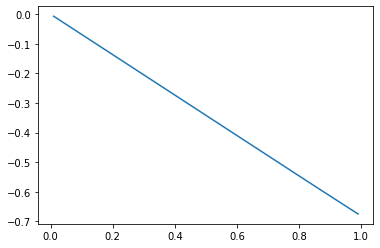

In [46]:
# Alpha is normalization term. As Alpha is increased the data smoothing increases too. 
from sklearn.linear_model import Lasso
#lr_L = Lasso()
alpha = []
error = []

for i in range(1,100):
  alpha.append(i/100)
  lr_L = Lasso(alpha = (i/100))
  error.append(np.mean(cross_val_score(lr_L, X_train,y_train, scoring =  'neg_mean_absolute_error' ,cv = 5)))
  if i % 2 == 0:
    print(f'Lasso Regression mean error = {result} for alpha = {i/100}')

plt.plot(alpha,error)
#result = np.mean(cross_val_score(lr_L, X_train,y_train, scoring =  'neg_mean_absolute_error' ,cv = 5)) # negative mean absolute error tells us how far on average we are off general prediction.
#print(f'Lasso Regression mean error = {result} for alpha = 1')


In [47]:
# Lasso for best alpha
lr_L = Lasso(alpha = 0.2)

5 - Random Forests

In [48]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

result = np.mean(cross_val_score(rf, X_train,y_train, scoring =  'neg_mean_absolute_error' ,cv = 5)) 
print(f'Random Forest mean error = {result}')


Random Forest mean error = -0.06548238689103122


5 - Tune models through GridSearch

In [ ]:
#RF Regressor
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':range(10,100,10), 'criterion': ('mse','mae'), 'max_features':('auto','sqrt','log2')}
gs = GridSearchCV(rf, parameters, scoring =  'neg_mean_absolute_error', cv = 5 )
gs.fit(X_train, y_train)

In [50]:
gs.best_score_

-0.06317035961437723

In [51]:
gs.best_estimator_

RandomForestRegressor(criterion='mse', n_estimators=60)

Test Ensembles

In [52]:
#Linear Regression Testing
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
#Lasso Regression Testing
lr_L.fit(X_train,y_train)
lr_L_pred = lr_L.predict(X_test)
#Random Forest Testing
rf_pred = gs.best_estimator_.predict(X_test)

In [53]:
from sklearn.metrics import mean_absolute_error

print(f' Mean  Ansolute error for Linear Regression = {mean_absolute_error(y_test,lr_pred)}')
print(f' Mean  Ansolute error for Lasso Regression = {mean_absolute_error(y_test,lr_L_pred)}')
print(f'Mean  Ansolute error for Random Forest = {mean_absolute_error(y_test,rf_pred)}')

 Mean  Ansolute error for Linear Regression = 0.0004972581992328791
 Mean  Ansolute error for Lasso Regression = 0.1387987427318632
Mean  Ansolute error for Random Forest = 0.07708333333333334


Combine Models prediction and compute average

In [54]:
#For combine prediction from LR and RF and computer Average
agg_pred = (lr_pred + rf_pred)/2
print(f'Mean  Ansolute error for Linear Regression + Random Forest = {mean_absolute_error(y_test,agg_pred)}')
# Or can take proprtions for instance: 90% from LR and 10% from RF


Mean  Ansolute error for Linear Regression + Random Forest = 0.03879029576628214


# Putting the Model into Production using Flask

Pickle the model

In [55]:
import pickle
pickl = {'model': lr}
pickle.dump( pickl, open( 'lr_model_file' + ".p", "wb" ) )

In [56]:
def load_models():
    file_name = "models/lr_model_file.p"
    with open(file_name, 'rb') as pickled:
        data = pickle.load(pickled)
        model = data['model']
    return model
    
model = load_models()

In [89]:
#!mkdir FlaskAPI
drive.mount('/content/drive2')
path = '/content/drive2/My Drive/End-to-End Data Science/FlaskAPI'
os.chdir(path)
!ls

Drive already mounted at /content/drive2; to attempt to forcibly remount, call drive.mount("/content/drive2", force_remount=True).
app.py	curl_req.ipynb	data_in.py  models  Procfile  __pycache__  wsgi.py


In [57]:
#!touch app.py
#!touch Procfile
#!touch wsgi.py

Run the wsgi.py to start a webserver on a local host 

In [62]:
#!python wsgi.py

 * Serving Flask app "app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


# Other

curl is used to access APIs

In [93]:
from data_in import input
mmodel = load_models()
x = np.array(input).reshape(1,-1)
prediction = model.predict(x[:,:-1])[0]